# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV files
zillow_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining/ca_filtered_2015_2025.csv')
fair_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining/fair_plan.csv')
nonrenewed_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining/renewals_totals.csv')


In [ ]:
# Ensuring ZIP codes are strings and are padded
zillow_df['RegionName'] = zillow_df['RegionName'].astype(str).str.zfill(5)
fair_df['ZIP Code'] = fair_df['ZIP Code'].astype(str).str.zfill(5)
nonrenewed_df['ZIP Code'] = nonrenewed_df['ZIP Code'].astype(str).str.zfill(5)


In [ ]:
# Renaming
zillow_df.rename(columns={
    'RegionName' : 'zipcode'
}, inplace=True)
fair_df.rename(columns={
    'ZIP Code': 'zipcode'
}, inplace=True)

nonrenewed_df.rename(columns={
    'ZIP Code': 'zipcode'
}, inplace=True)


In [ ]:
# Merging all dataframes on ZIP code
merged_df = zillow_df.merge(fair_df, on='zipcode', how='left')
merged_df = merged_df.merge(nonrenewed_df, on='zipcode', how='left')

# Quick overview
print(merged_df.info())
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Columns: 143 entries, zipcode to Pct NonRenewed Company
dtypes: float64(139), object(4)
memory usage: 1.7+ MB
None
         2015-01-31    2015-02-28    2015-03-31    2015-04-30    2015-05-31  \
count  1.449000e+03  1.450000e+03  1.450000e+03  1.450000e+03  1.451000e+03   
mean   4.977429e+05  5.017527e+05  5.047397e+05  5.072003e+05  5.098321e+05   
std    4.088145e+05  4.142047e+05  4.179642e+05  4.196247e+05  4.213601e+05   
min    3.209876e+04  3.140018e+04  3.076512e+04  3.060057e+04  3.091836e+04   
25%    2.347801e+05  2.359841e+05  2.373446e+05  2.381882e+05  2.405688e+05   
50%    3.975477e+05  3.991457e+05  4.004320e+05  4.019168e+05  4.028121e+05   
75%    6.222865e+05  6.274672e+05  6.314207e+05  6.329307e+05  6.348452e+05   
max    4.896548e+06  4.984086e+06  5.058206e+06  5.114430e+06  5.171498e+06   

         2015-06-30    2015-07-31    2015-08-31    2015-09-30    2015-10-31  \
count  1.451000e+03 

In [6]:
merged_df.head()

,zipcode,State,CountyName,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,...,Pct FAIR,Unnamed: 0_y,New,Renewed,Expiring,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed,Pct NonRenewed,Pct NonRenewed Owner,Pct NonRenewed Company
0,90011,CA,Los Angeles County,Los Angeles,272797.749060,273731.410640,273037.591937,273652.184775,274956.914699,276678.954478,...,0.245565,9.0,8252.0,51548.0,58630.0,4649.0,2433.0,0.120791,0.079294,0.041498
1,90650,CA,Los Angeles County,Norwalk,378354.070519,378582.823306,378376.678343,379111.585130,380911.787316,382967.799537,...,0.020326,124.0,13436.0,127490.0,140234.0,10356.0,2388.0,0.090877,0.073848,0.017029
2,91331,CA,Los Angeles County,Los Angeles,336296.162543,337072.901053,336946.819080,337691.765656,339016.050421,340929.304834,...,0.059645,201.0,10184.0,87091.0,96329.0,7062.0,2176.0,0.095901,0.073311,0.022589
3,90044,CA,Los Angeles County,Los Angeles,292682.463638,294284.588151,294559.510597,295333.652616,296319.065384,297981.934803,...,0.144252,41.0,10234.0,71317.0,80285.0,6164.0,2804.0,0.111702,0.076776,0.034926
4,92336,CA,San Bernardino County,Fontana,363423.644238,364745.962739,365506.574030,366494.427219,368010.186795,369999.231631,...,0.006371,457.0,26129.0,146629.0,169394.0,18864.0,3901.0,0.134391,0.111362,0.023029


In [ ]:
import os
# Defining the path to Desktop
desktop_path = os.path.expanduser('~/Desktop/merged_output.xlsx')

# Saving the Excel file
merged_df.to_excel(desktop_path, index=False)

print(f"Excel file saved to: {desktop_path}")

Excel file saved to: /Users/abhaychaudhary/Desktop/merged_output.xlsx


In [8]:
# Summary statistics for all numerical columns
print(merged_df.describe(include='all'))

# Missing values
print(merged_df.isnull().sum())


       zipcode State          CountyName         City    2015-01-31  \
count     1543  1543                1543         1509  1.449000e+03   
unique    1543     1                  58          887           NaN   
top      90011    CA  Los Angeles County  Los Angeles           NaN   
freq         1  1543                 274           97           NaN   
mean       NaN   NaN                 NaN          NaN  4.977429e+05   
std        NaN   NaN                 NaN          NaN  4.088145e+05   
min        NaN   NaN                 NaN          NaN  3.209876e+04   
25%        NaN   NaN                 NaN          NaN  2.347801e+05   
50%        NaN   NaN                 NaN          NaN  3.975477e+05   
75%        NaN   NaN                 NaN          NaN  6.222865e+05   
max        NaN   NaN                 NaN          NaN  4.896548e+06   

          2015-02-28    2015-03-31    2015-04-30    2015-05-31    2015-06-30  \
count   1.450000e+03  1.450000e+03  1.450000e+03  1.451000e+03  1.4

In [ ]:
# Number of missing values per column
missing_counts = merged_df.isnull().sum()

# Showing only columns with missing values
missing_counts[missing_counts > 0].sort_values()

Pct NonRenewed Company     4
Unnamed: 0_y               4
New                        4
Renewed                    4
Pct NonRenewed Owner       4
                          ..
2015-05-31                92
2015-04-30                93
2015-03-31                93
2015-02-28                93
2015-01-31                94
Length: 101, dtype: int64

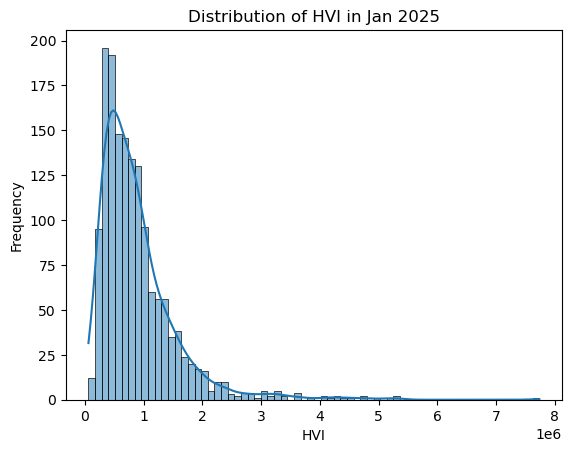

In [10]:
# Distribution of Housing Value Index (example column: '2025-01')
sns.histplot(merged_df['2025-01-31'], kde=True)
plt.title("Distribution of HVI in Jan 2025")
plt.xlabel("HVI")
plt.ylabel("Frequency")
plt.show()

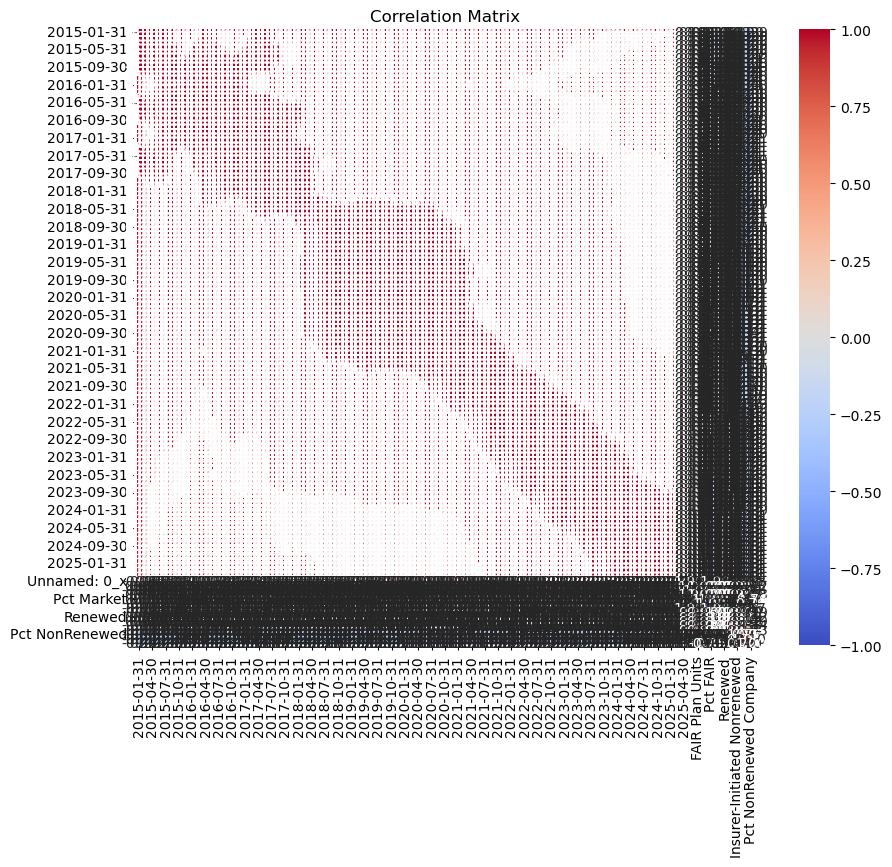

In [ ]:
# Computing correlation matrix (excluding non-numeric data)
corr = merged_df.select_dtypes(include=[np.number]).corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Identifying Housing Value Index (HVI) date columns
date_columns = [col for col in zillow_df.columns if col.startswith('20')]

# Just to confirm
print("Number of date columns:", len(date_columns))
print(date_columns[:5])  # First few


Number of date columns: 124
['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31']


In [ ]:
# Melting wide → long
hvi_long = pd.melt(zillow_df,
                   id_vars=['zipcode'],  # columns to keep
                   value_vars=date_columns,  # columns to unpivot
                   var_name='date',  # new column for dates
                   value_name='HVI')  # new column for values

# Converting string date to datetime object
hvi_long['date'] = pd.to_datetime(hvi_long['date'])

# Checking result
print(hvi_long.head())

  zipcode       date            HVI
0   90011 2015-01-31  272797.749060
1   90650 2015-01-31  378354.070519
2   91331 2015-01-31  336296.162543
3   90044 2015-01-31  292682.463638
4   92336 2015-01-31  363423.644238


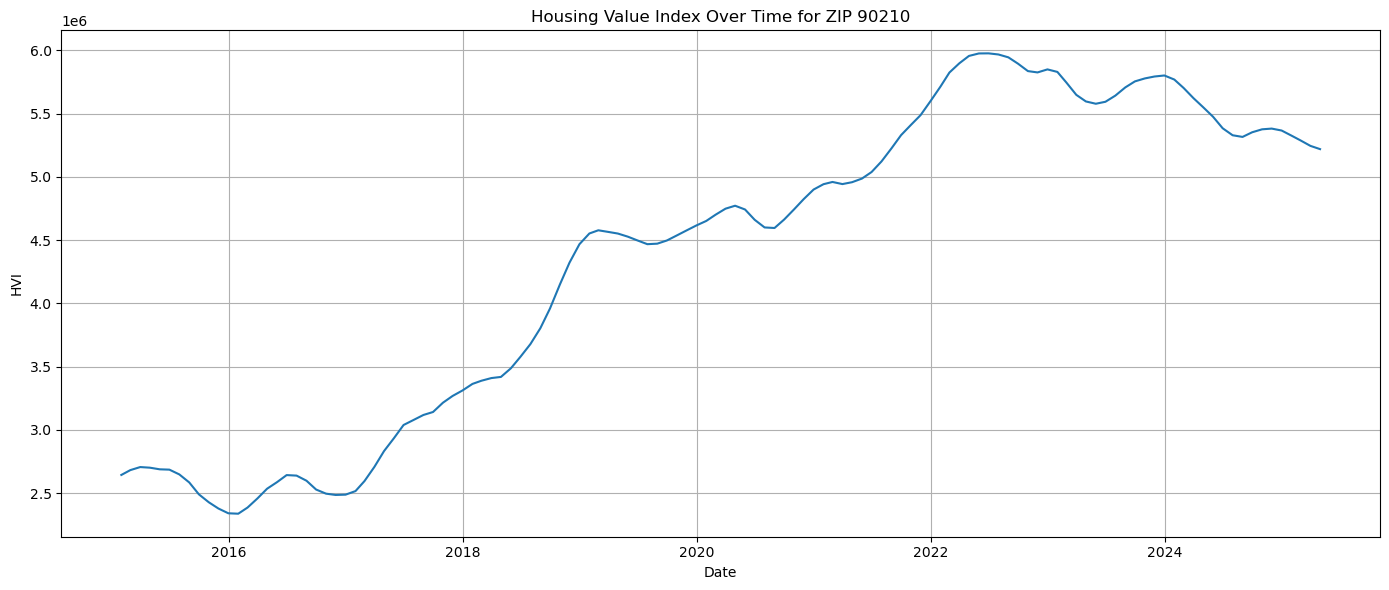

In [ ]:
# Choosing a sample ZIP
zip_sample = '90210'

# Filtering for ZIP
zip_ts = hvi_long[hvi_long['zipcode'] == zip_sample]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=zip_ts, x='date', y='HVI')
plt.title(f"Housing Value Index Over Time for ZIP {zip_sample}")
plt.xlabel("Date")
plt.ylabel("HVI")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Creating new feature: % units on FAIR plan
merged_df['pct_fair_units'] = (merged_df['num_fair_units'] / 
                               (merged_df['num_fair_units'] + merged_df['num_non_fair_units'])) * 100

# Scatter plot: FAIR plan % vs. HVI (Jan 2025)
sns.scatterplot(data=merged_df, x='pct_fair_units', y='2025-01')
plt.title("HVI vs. % Units on FAIR Plan (Jan 2025)")
plt.xlabel("% Units on FAIR Plan")
plt.ylabel("HVI (Jan 2025)")
plt.grid(True)
plt.show()

KeyError: 'num_fair_units'